# Average filter kernel 

In [1]:
import numpy as np
import cv2 as cv

def apply_filter(f, k):
    """
    Applies a filter to an input image.

    Args:
        f (numpy.ndarray): Input image as a 2D numpy array.
        k (numpy.ndarray): Filter kernel as a 2D numpy array.

    Returns:
        numpy.ndarray: Filtered image as a 2D numpy array.
    """
    g = cv.filter2D(f.astype(np.float32), -1, k.astype(np.float32))    # filter2D function is used to apply a filter, or kernel, to an input image.
    return g

# Define the input image and filter kernel
f = np.array([[0, 0, 0, 0, 0, 0, 0, 0], 
              [0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 180, 90, 90, 180, 90, 0],
              [0, 0, 180, 90, 180, 180, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0]])

k = 1/9*np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

# Apply the filter to the input image
filtered_image = apply_filter(f, k)

# Print the filtered image
print(filtered_image)

[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 20. 30. 40. 40. 40. 30. 20.]
 [ 0. 40. 60. 90. 90. 80. 50. 20.]
 [ 0. 40. 60. 90. 90. 80. 50. 20.]
 [ 0. 20. 30. 50. 50. 40. 20.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


# Average Filtering Using Loops

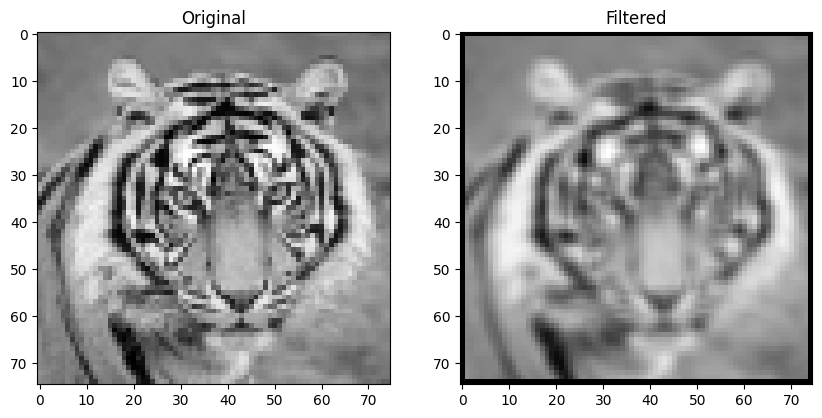

In [7]:
import cv2 as cv  
import matplotlib.pyplot as plt  
import numpy as np  
import math  

def filter(image, kernel):
    """
    Applies a 2D convolution filter to an image.

    Args:
        image (numpy.ndarray): Input image as a 2D numpy array.
        kernel (numpy.ndarray): Filter kernel as a 2D numpy array.

    Returns:
        numpy.ndarray: Filtered image as a 2D numpy array.
    """
    # Ensure that the kernel dimensions are odd
    assert kernel.shape[0] % 2 == 1 and kernel.shape[1] % 2 == 1, "Kernel dimensions must be odd"

    # Central Pixel Reference
    # Kernel Center: A kernel with odd dimensions has a single central pixel that is aligned with the target pixel in the image. 
    # This is crucial for symmetric filtering because the kernel is evenly distributed around the central pixel

    # Calculate the center of the kernel
    k_hh, k_hw = math.floor(kernel.shape[0] / 2), math.floor(kernel.shape[1] / 2)

    # Get image dimensions
    h, w = image.shape

    # Normalize image to range [0.0, 1.0]
    image_float = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
    
    # Adjusts the values of the image to fall within a specified range. 
    # This is important when performing operations like convolution, which may require values in a consistent range.

    # Initialize the result array with zeros
    result = np.zeros(image.shape, 'float')   # store the output of the filtering process

    # Apply the kernel to each pixel of the image, ignoring the borders
    # performs convolution by sliding the kernel across each pixel (excluding the borders) and computing the result using the dot product
    for m in range(k_hh, h - k_hh):
        for n in range(k_hw, w - k_hw):
            # Extract the region of interest and flatten it
            region = image_float[m - k_hh:m + k_hh + 1, n - k_hw : n + k_hw + 1].flatten()
            # Compute the dot product between the region and the kernel
            result[m, n] = np.dot(region, kernel.flatten())

    return result

# Load the input image in grayscale with reduced size (8-bit grayscale)
img = cv.imread('img/tiger.jpg', cv.IMREAD_REDUCED_GRAYSCALE_8)

# Create a figure with two subplots to show original and filtered images
f, axarr = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image in the first subplot
axarr[0].imshow(img, cmap="gray")
axarr[0].set_title('Original')

# Define a 3x3 averaging filter kernel
kernel = np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]], dtype='float')

# Apply the filter to the image
imgb = filter(img, kernel)

# Scale the filtered image back to range [0, 255] and convert to uint8 type
imgb = imgb * 255.0
imgb = imgb.astype(np.uint8)

# Display the filtered image in the second subplot
axarr[1].imshow(imgb, cmap="gray")
axarr[1].set_title('Filtered')

# Save the filtered image to a file
cv.imwrite('keira_filtered.png', imgb)

# Show the plot with both images
plt.show()


# Averaging Using Filt2D

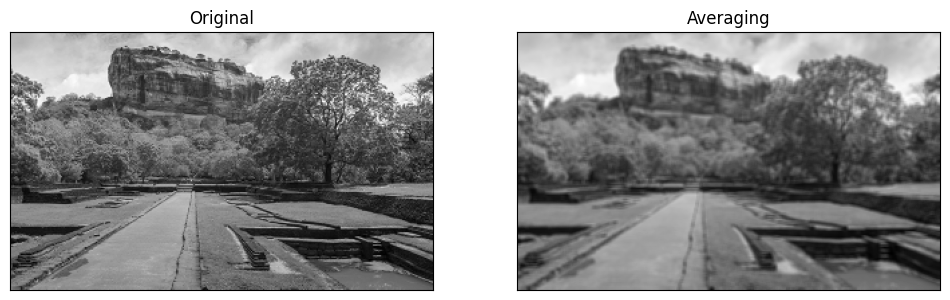

In [32]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Read the image
im = cv.imread('img/sigiriya.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None

# Define the kernel for averaging
kernel = np.ones((3,3),np.float32)/9

# Apply the filter to the image
imavg = cv.filter2D(im, cv.CV_32F, kernel)   # Convolves an image with the kernel.

# Display the original and averaged images
fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(12,9))
axes[0].imshow(im, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imavg, cmap='gray')
axes[1].set_title('Averaging')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

# Sobel Filtering

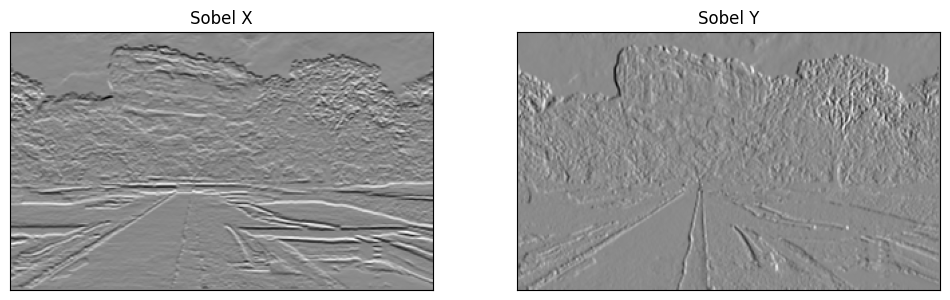

In [31]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def apply_sobel_filter(image_path):
    """
    Applies the Sobel filter to an input image to detect edges in both the X and Y directions.

    Args:
        image_path (str): Path to the input image file.
    """
    # Load the image in grayscale with reduced size (2x2 scale down)
    im = cv.imread(image_path, cv.IMREAD_REDUCED_GRAYSCALE_2)
    assert im is not None, "Error loading image. Check the image path."

    # Define the Sobel filters for X and Y directions
    sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

    # Apply the Sobel filter in the X direction
    im_x = cv.filter2D(im, cv.CV_64F, sobel_x)

    # Apply the Sobel filter in the Y direction
    im_y = cv.filter2D(im, cv.CV_64F, sobel_y)

    # Create a figure with 1 row and 2 columns of subplots
    fig, ax = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(12, 9))

    # Display the result of Sobel X filter on the first subplot
    ax[0].imshow(im_x, cmap='gray')
    ax[0].set_title('Sobel X')  # Title for the Sobel X subplot
    ax[0].set_xticks([])        # Remove x-axis ticks
    ax[0].set_yticks([])        # Remove y-axis ticks

    # Display the result of Sobel Y filter on the second subplot
    ax[1].imshow(im_y, cmap='gray')
    ax[1].set_title('Sobel Y')  # Title for the Sobel Y subplot
    ax[1].set_xticks([])        # Remove x-axis ticks
    ax[1].set_yticks([])        # Remove y-axis ticks

    # Show the plot with both subplots
    plt.show()

# Apply the Sobel filter to an image located at 'img/sigiriya.jpg'
apply_sobel_filter('img/sigiriya.jpg')


# Sharpening

DescribeResult(nobs=84135, minmax=(0, 73), mean=1.297462411600404, variance=13.521458723285198, skewness=6.147052889398213, kurtosis=55.430272139483776)


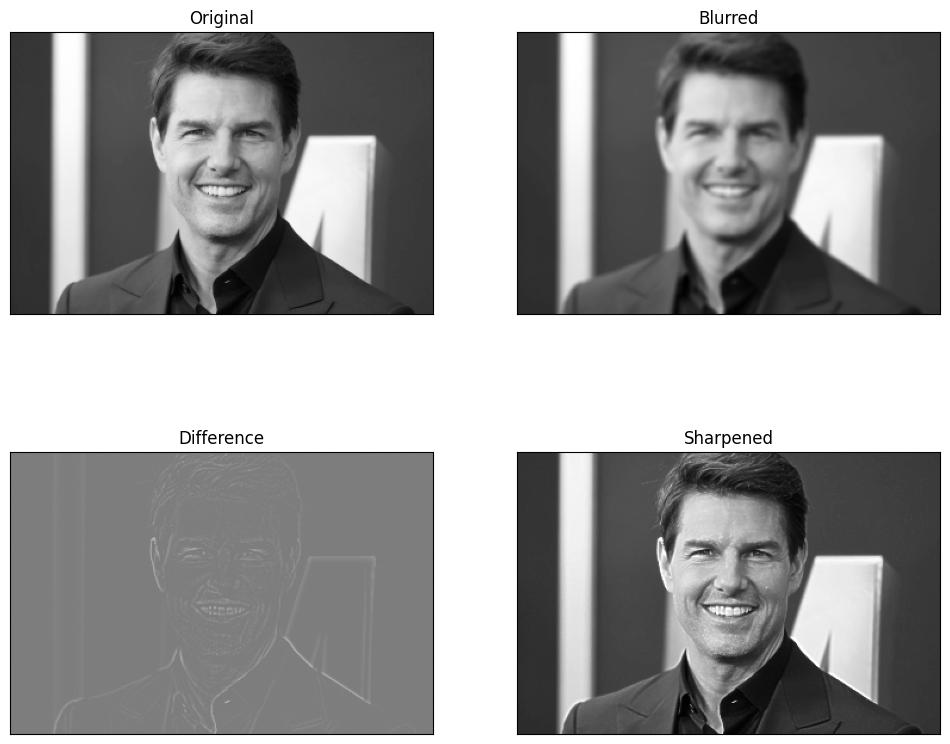

In [30]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import stats

# Load the input image in grayscale mode
img = cv.imread('img/tom.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

# Define the standard deviation for the Gaussian kernel
sigma = 2

# Create a Gaussian kernel with size 5 and standard deviation sigma
kernel = cv.getGaussianKernel(5, sigma)

# Apply Gaussian blur to the image using the separable Gaussian kernel
# cv.sepFilter2D applies a filter defined by separate kernel for x and y directions
blurred = cv.sepFilter2D(img, -1, kernel, kernel, anchor=(-1,-1), delta=0, borderType=cv.BORDER_REPLICATE)

# Compute the difference between the original image and the blurred image
diff = cv.subtract(img, blurred)

# Sharpen the image by adding the weighted difference to the original image
# The weight for the difference is 1.5, and the original image is weighted by 1.0
sharpened = cv.addWeighted(img, 1.0, diff, 1.5, 0)

# Print the descriptive statistics of the difference image
print(stats.describe(diff.ravel()))

# Set up a 2x2 grid of subplots for displaying the images
fig, axes = plt.subplots(2, 2, sharex='all', sharey='all', figsize=(12, 10))

# Display the original image
axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title('Original')
axes[0, 0].set_xticks([]), axes[0, 0].set_yticks([])

# Display the blurred image
axes[0, 1].imshow(blurred, cmap='gray')
axes[0, 1].set_title('Blurred')
axes[0, 1].set_xticks([]), axes[0, 1].set_yticks([])

# Display the difference image with brightness adjustment for visibility
# The +125 is used to shift pixel values into the display range [0, 255]
axes[1, 0].imshow(diff + 125, cmap='gray', vmin=0, vmax=255)
axes[1, 0].set_title('Difference')
axes[1, 0].set_xticks([]), axes[1, 0].set_yticks([])

# Display the sharpened image
axes[1, 1].imshow(sharpened, cmap='gray')
axes[1, 1].set_title('Sharpened')
axes[1, 1].set_xticks([]), axes[1, 1].set_yticks([])

# Show the plots
plt.show()


# Gaussian Filter 

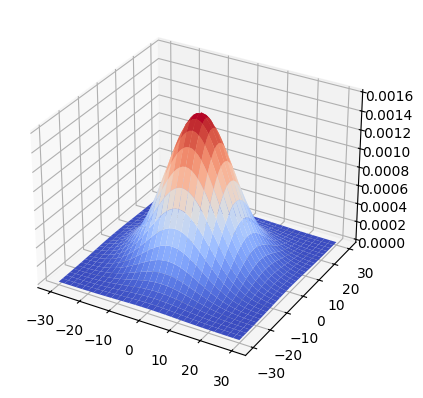

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
sigma = 10          # Standard deviation of the Gaussian distribution
hw = 3 * sigma      # Half-width of the Gaussian kernel, adjusted to cover more area

# Generate x and y values from -hw to hw
x = np.linspace(start=-hw, stop=hw, num=2*hw+1)
y = np.linspace(start=-hw, stop=hw, num=2*hw+1)

# Create a grid of x and y values
X, Y = np.meshgrid(x, y)

# Compute the 2D Gaussian function on the grid
G = 1 / (2 * np.pi * sigma**2) * np.exp(- (X**2 + Y**2) / (2 * sigma**2))

# Plot the Gaussian surface in 3D
fig = plt.figure()                      # Create a new figure
ax = fig.add_subplot(111, projection='3d')  # Add a 3D subplot to the figure
ax.plot_surface(X, Y, G, cmap='coolwarm')   # Plot the surface with color map
plt.show()                             # Display the plot


In [27]:
import numpy as np

# Define the standard deviation and half-width
sigma = 1
hw = 2  # Half-width of the Gaussian kernel (length = 2*hw + 1)

# Generate x values ranging from -hw to hw
x = np.linspace(start=-hw, stop=hw, num=2*hw+1)

# Compute the 1-D Gaussian kernel
g = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-x**2 / (2 * sigma**2))

# Print the Gaussian kernel
print(g)


[0.05399097 0.24197072 0.39894228 0.24197072 0.05399097]


In [15]:
# Outer product between two 1-D Gaussians
G = np.outer(g, g)
G

array([[0.00291502, 0.00291502, 0.00291502, 0.00291502, 0.00291502],
       [0.00291502, 0.00291502, 0.00291502, 0.00291502, 0.00291502],
       [0.00291502, 0.00291502, 0.00291502, 0.00291502, 0.00291502],
       [0.00291502, 0.00291502, 0.00291502, 0.00291502, 0.00291502],
       [0.00291502, 0.00291502, 0.00291502, 0.00291502, 0.00291502]])

In [26]:
import numpy as np

# Define the 3x3 Sobel kernel for edge detection in the X direction
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
print("Sobel X Kernel (Direct Definition):")
print(sobel_x)

# Define vectors a and b for the outer product calculation
b = np.array([-1, 0, 1])  # Vertical kernel vector
a = np.array([1, 2, 1])   # Horizontal kernel vector

# Compute the Sobel X kernel using the outer product of a and b
sobel_x = np.outer(a, b)
print("\nSobel X Kernel (Using np.outer):")
print(sobel_x)


Sobel X Kernel (Direct Definition):
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]

Sobel X Kernel (Using np.outer):
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
